<a href="https://colab.research.google.com/github/AnaliaLeyez/AnaliaLeyez/blob/main/Copia_de_u4_agrupar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El Análisis Exploratorio de Datos es una etapa clave dentro de un proyecto de Ciencia de Datos. Su objetivo principal es entender los datos antes de aplicar
*modelos, pruebas estadísticas o algoritmos de aprendizaje automático.*

***Es importante porque:***

- Permite detectar patrones y relaciones entre variables.

- Ayuda a identificar valores atípicos (outliers) o datos faltantes.

- Facilita resumir la información de forma clara (medias, medianas, conteos, distribuciones).

- Nos orienta para decidir qué transformaciones o agrupaciones aplicar.

**Pasos típicos en el EDA**

- 1.Inspección inicial de los datos: ver estructura, columnas, tipos de variables.

- 2.Resumen estadístico: medidas como media, mediana, moda, conteos y proporciones.

- 3.Agrupaciones y segmentaciones: analizar subconjuntos de datos según una categoría (ejemplo: premios Nobel por continente, género, categoría, etc.).

- 4.Visualización: gráficos que muestran distribuciones y comparaciones.


## Unidad 4 - Agrupar

Basada en los los libros:
- Capitulo 10 del libro Python for Data Analysis
- Capitulo 3 del libro Python Data Science Handbook

# Inicialización de dependencias

In [ ]:
# import paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# options numpy
np.random.seed(12345)

pd.set_option('display.min_rows', 30)
pd.set_option('display.max_rows', 100)


Datos de premios nobel: https://www.kaggle.com/datasets/imdevskp/nobel-prize/

### Descargo el archivo desde Kaggle

**Nota:**  
Es posible que la celda a continuacion arroje un error, como "solucion", se debe reejecutar varias veces hasta que se visualice el archivo nobel_prize_v9.csv




In [ ]:
import kagglehub
import os

# Seteo Variable de entorno KAGGLEHUB_CACHE, donde se descargara el archivo
os.environ["KAGGLEHUB_CACHE"] = "/content"

# Download latest version
path = kagglehub.dataset_download("imdevskp/nobel-prize")

print("Path to dataset files:", path)
# lo muevo al directorio de trabajo
!cp -r {path} .
## muevo el archivo descargado y al mismo tiempo renombro el mismo
!cp /content/nobel-prize/complete.csv /content/nobel_prize_v9.csv
print("archivo /content/nobel_prize_v9.csv disponible")



In [ ]:
nobel_complete = pd.read_csv("nobel_prize_v9.csv")

In [ ]:
nobel_complete

# 1.Inspección inicial del dataset Nobel

In [ ]:
#Información general de las columnas
nobel_complete.info()

In [ ]:
#Cantidad de Filas y columnas
nobel_complete.shape

In [ ]:
# crea un nuevo DataFrame llamado 'nobel', solo con algunas columnas
nobel = nobel_complete[['awardYear', 'category', 'prizeAmount', 'prizeAmountAdjusted', 'name', 'gender', 'birth_continent']]

# Sobrescribimos los nombres de columnas directamente
nobel.columns = ['Año', 'Categoría', 'Monto_Premio',
                 'Monto_Premio_Ajustado', 'Nombre', 'Género', 'Continente_Nacimiento']
nobel.info()

In [ ]:
# Resumen numérico
nobel.describe()

In [ ]:
nobel

In [ ]:
#Nuevos nombres de las columnas
nobel.columns

In [ ]:
#Tipos de datos de cada columna
# verificar si algo que debería ser numérico está cargado como texto
nobel.dtypes

#2.Resumen estadístico

##Medidas de tendencia central

In [ ]:
# Media (promedio)
nobel["Monto_Premio"].mean().round(2)

In [ ]:

# Mediana (valor central)
nobel["Monto_Premio"].median()

In [ ]:
# Moda (valor más frecuente)
nobel["Categoría"].mode()

Analisis:
- En promedio, el monto del premio Nobel del ronda los 3.460.596, pero hay que tener en cuenta que la media es sensible a valores extremos. Si en algunos años el monto fue muy alto (o muy bajo), la media se “arrastra” hacia esos valores.
- La mediana dice que, si ordenamos todos los montos de menor a mayor, el valor del medio es 700.000.
Pero, como la mediana es mucho menor que la media, significa que hay valores muy grandes que están inflando el promedio.
- La categoría más frecuente de premios Nobel es Fisiología o Medicina.

##Medidas de dispersión

In [ ]:
# Valor mínimo y máximo
nobel["Monto_Premio"].min(), nobel["Monto_Premio"].max()

In [ ]:
# Desviación estándar
#nobel["Monto_Premio"].std()
round(nobel["Monto_Premio"].std(), 2)

In [ ]:
# Rango (max - min)
nobel["Monto_Premio"].max() - nobel["Monto_Premio"].min()

Analisis:
- Teniendo en cuenta que el monto mínimo es de 114.935 y corresponde a uno de los premios más bajos en la historia y el monto máximo es de 10.000.000 más adaptado a los últimos años, podemos ver cómo el monto del Nobel fue cambiando drásticamente a lo largo del tiempo.
- La desviación estándar es 4.014.529 bastante grande, lo que indica que hay alta variabilidad en los montos de los premios.
- El rango (9.885.065) es casi igual al máximo (10.000.000) lo que confirma la presencia de valores extremos. por que se observa que entre el premio más bajo y el más alto hay una diferencia enorme.

##Conteos y proporciones de categorías

###Cantidad de valores únicos con nunique()

In [ ]:
# nunique() trae, cantidad de valores únicos por cada columna
nobel.nunique()

### Cuales son los valores únicos de una columna unique()
trae, todos los valores únicos que existen en esa columna

In [ ]:
# que categorias hay?
nobel["Categoría"].unique()

### Frecuencia de cada Valor Unico con value_counts()
 cuenta la frecuencia de cada valor único que aparecede cada fila de una columna

In [ ]:
# cuantos premios hay de cada categoria?
nobel["Categoría"].value_counts()

###Ordenar
de otra forma (ascendente) con **sort_values()**



In [ ]:
# ¿cuál es la categoría con más y con menos premios?
nobel["Categoría"].value_counts().sort_values()

Analisis:
- Nunique() mostró que hay 6 categorías distintas de premios Nobel: Economic Sciences, Physics, Chemistry, Peace, Physiology or Medicine, Literature.
- utilizando sort_values(), para ordenar las categorías, podemos ver que los más premiados son Fisiología o Medicina (219), seguida por Física (213), y Ciencias Económicas (84) tiene el menor número.

#3.Agrupaciones y segmentaciones

### Agrupacion segun valores Unicos con groupby
agrupa datos basándose en los valores únicos que se encuentran en la columna.

In [ ]:
# "Agrupá las filas del DataFrame nobel según los valores de la columna Categoría."
# Todavia no calcula nada
grouped = nobel.groupby("Categoría")


In [ ]:
#la agrupación se ha realizado correctamente
#grouped contiene los datos organizados por la columna "categoría"
grouped

In [ ]:
#vista interna de cómo Pandas organizó las filas en cada grupo.
grouped.indices

In [ ]:
# ¿Cuantos grupos se han creado?
# len, cuenta número de categorías únicas que existen en la columna
print(len(grouped))

6


In [ ]:
#Agrupacion por columnas:
#value_counts() → más directo y rápido cuando solo querés frecuencias de una columna.
#grouped.size() → más flexible, porque podés combinar con otras operaciones (mean(), sum()
# tiene cada grupo (según la columna de agrupación).
grouped.size()

In [ ]:
# grouped se puede iterar!
# se itera por cada categoria y se muestran los 5 primeros
#Cuando se itera un objeto groupby, Pandas devuelve pares:
for (nombre, grupo) in grouped: # nombre-> valor de la columna (Categoría).
    print(f'Head de {nombre}:') #grupo → sub-DF con todas las filas de ese grupo.
    print(30*'-')
    print(grupo.head(5), '\n\n')

In [ ]:
#suma los valores de cada grupo, solo columnas que contienen datos numéricos
grouped.sum(numeric_only=True)

In [ ]:
# sumo los valores de una columna
grouped["Monto_Premio"].sum()

In [ ]:
#¿Cuál fue el promedio de los montos de premios Nobel en cada categoría?”
# dos columnas
grouped[["Monto_Premio", "Monto_Premio_Ajustado"]].mean()

# Group en pandas (Funcionamiento)

In [ ]:
dx = pd.DataFrame({
    "key":list("ABCABC"),
    "data":[1,2,3,4,5,6]
})

dx


### Conceptos: Split - Apply - Combine

In [ ]:
#agrupamos se toma el DF y lo organiza en grupos basados en los valores únicos de la columna "key"
# resuelve un objeto especial que contiene estos grupos
dx_grouped = dx.groupby("key")
dx_grouped

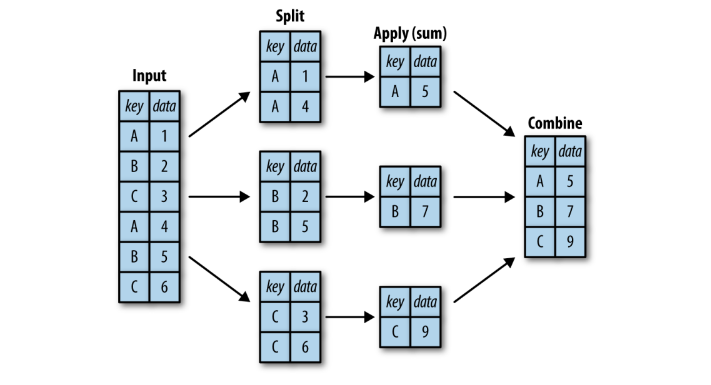


- Split: Pandas corta el DataFrame en pedacitos (por Categoría).

- Apply: A cada pedacito le aplica una función (ej: suma).

- Combine: Junta los resultados en una nueva tabla lista para analizar.

In [ ]:
#en qué posiciones del DataFrame original están las filas de cada grupo.
dx_grouped.indices


In [ ]:
# aplicamos una funcion de agregacion sum()
dx_grouped.sum()

In [ ]:
dx.groupby("key").sum()

# Agrupar y agregar

Pandas permite agrupar, por:

* un nombre o varios nombres de columnas
* lista de valores,
* serie
* un diccionario
* una funcion


In [ ]:
#DF para ejemplo
df1 = pd.DataFrame({"key1" : ["a", "a", "a", "a", None, "b", "b", "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, 2, 1, 1, 2, None, 1], dtype="Int64"),
                   "data1" : np.random.standard_normal(11),
                   "data2" : np.random.standard_normal(11)})
df1

In [ ]:
#Creamos el groupby segun los valores únicos de la columna "key1".
#pero aún no se aplica ninguna operación
df1.groupby("key1")

In [ ]:
df1.groupby("key1").indices

In [ ]:
# Media de las columnas para cada valor único en "key1".
df1.groupby("key1").mean()

Cuando dropna se establece en False, los valores faltantes (None) en la columna, se consideran como un grupo separado.

In [ ]:
df1.groupby("key1", dropna=False).mean()

In [ ]:
# Media de columnas para cada combinación única de valores en "key1" y "key2"
means_jg = df1.groupby(["key1", "key2"]).mean()
means_jg

In [ ]:
# Lo mismo pero sin guardarlo en la variable
df1.groupby(["key1", "key2"]).mean()

## Agrupar con dict, listas o series.


In [ ]:
# creamos un ejemplo
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people.iloc[2:3, [1, 2]] = np.nan # agregamos algunos NA
people

In [ ]:
# Agrupa las filas segun el  diccionario grp_names y calcula la suma de los valores para cada grupo
grp_names = {"Joe": "AA", "Steve": "AA", "Wanda": "BB", "Jill": "BB", "Trey": "BB"}
gdict = people.groupby(grp_names) #Agrupa en 2 grupos (AA y BB) según el diccionario.
gdict.sum()

In [ ]:
#Agrupar segun lista
df = pd.DataFrame({
    "Número": [1, 2, 3, 4, 5],
    "Valor":  [10, 20, 30, 40, 50]
})
print(df)

In [ ]:
# Lista que dice a qué grupo pertenece cada fila
ix = ["Impar", "Par", "Impar", "Par", "Impar"]

# Agrupamos el DataFrame con esa lista
g = df.groupby(ix)
print(g.count())

# Selección de columnas al agrupar

Cuando usamos groupby en Pandas, el flujo mental es siempre:

Split → Apply → Combine
(dividir → aplicar función → combinar resultado)

In [ ]:
df1

1. Diferencia entre SeriesGroupBy y DataFrameGroupBy

Cuando agrupamos, podemos elegir una sola columna o varias columnas:

In [ ]:
# Una sola columna → SeriesGroupBy
df1.groupby("key1")["data1"]

In [ ]:
# Varias columnas → DataFrameGroupBy
df1.groupby("key1")[["data1","data2"]]

¿Qué cambia?

- SeriesGroupBy: resultado más simple (una Serie después de aplicar .sum(), .mean(), etc.).

- DataFrameGroupBy: resultado tabular (sigue siendo DataFrame).


In [ ]:
#Ejemplo concreto
df2 = pd.DataFrame({
    "key1": ["a","a","b","b"],
    "data1": [1,2,3,4],
    "data2": [5,6,7,8]
})


In [ ]:
#Agrupamos una sola columna "data1" se obtiene una serie
df2.groupby("key1")["data1"].sum()

In [ ]:
# Agrupando varias columnas se obtiene un dataframe
df2.groupby("key1")[["data1","data2"]].sum()

# Aplicar: agg() / función de agregación
El método .agg() te deja aplicar varias funciones a la vez

In [ ]:
#Para cada grupo en key1, Pandas calcula los valores...
df2.groupby("key1")[["data1","data2"]].agg(["min","mean","max"])


In [ ]:
#Funciones distintas por columna
df2.groupby("key1").agg({
    "data1": "min",   # solo mínimo para data1
    "data2": "max"    # solo máximo para data2
})
